In [2]:
%load_ext autoreload
%autoreload

In [3]:
import numpy as np
import crc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [4]:
x = np.linspace(-1, 1, 1001)
vectors = [{n : x**n for n in range(1000)}]
V = {}
for vec in vectors:
    V.update(vec)

In [5]:
rb, errors = crc.RB(V, x, 10**(-15), False)

TOLERANCE of 1e-15 MET: 49/1000 vectors in reduced basis


In [7]:
%autoreload
indexes, nodes, B = crc.EI(rb, x)

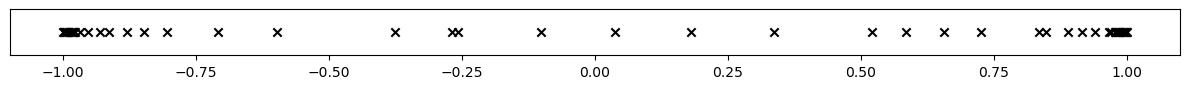

In [8]:
crc.check_nodes(nodes)

In [9]:
empirical_interpolants = {}
for k in rb:
    ei = crc.EI_h(B, rb[k], indexes, x)
    empirical_interpolants.update({k : ei})

In [10]:
crc.test_EI(empirical_interpolants, rb, x)

worst mismatch is 10^(-17.73205748693133)


In [ ]:
# fig, axs = plt.subplots(nrows=len(rb), ncols=1, figsize=(12, 2*len(rb)))
# for j, k in enumerate(rb):
#     axs[j].set_title(f'$<h_{{{j}}}, e_{{{j}}}> =$ {crc.dot(empirical_interpolants[k], rb[k], x)}')
#     axs[j].plot(x, rb[k]/np.sqrt(k+1/2), color='red')
#     axs[j].plot(x, empirical_interpolants[k]/np.sqrt(k+1/2), color='teal')
#     axs[j].scatter(nodes, [empirical_interpolants[k][n]/np.sqrt(k+1/2) for n in indexes], marker='x', color='k', zorder=2)
#     axs[j].set_xlim(-1, 1)
#     axs[j].set_ylim(-2, 2)    
# fig.tight_layout()

In [13]:
len(list(empirical_interpolants[0]))

1001

In [14]:
len(list(rb[0]))

1001

In [19]:
B.shape

(1001, 49)